## データの表示

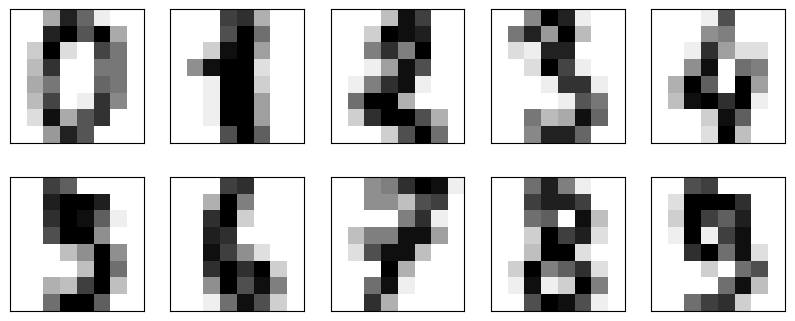

Data shape: (1797, 64)
Label: [0 1 2 3 4 5 6 7 8 9]


In [54]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()
# print(digits_data)

n_img = 10
plt.figure(figsize=(10, 4))
for i in range(n_img):
    ax = plt.subplot(2,5, i + 1)
    plt.imshow(digits_data.data[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print(f"Data shape: {digits_data.data.shape}")
print(f"Label: {digits_data.target[:n_img]}")

## データをtensor型に変換

In [55]:
import torch
from sklearn.model_selection import train_test_split

digits_img = digits_data.data
# print(digits_img)

labels = digits_data.target
# print(labels)

X_train, X_test, y_train, y_test = (train_test_split(digits_img, labels))

# tensor型に変換
X_train = torch.tensor(X_train, dtype=torch.float32)    # torch.Size([1347, 64])
X_test = torch.tensor(X_test, dtype=torch.float32)    # torch.Size([450, 64])
y_train = torch.tensor(y_train, dtype=torch.int64)    # torch.Size([1347])
y_test = torch.tensor(y_test, dtype=torch.int64)    # torch.Size([450])

## nnの定義

In [56]:
from torch import nn

# ニューラルネットワークの定義
# 入力層64次元、出力層10次元
# 隠れ層1: 入力64次元、出力32次元
# 隠れ層2: 入力32次元、出力16次元
net = nn.Sequential(
    nn.Linear(64, 32), # 入力64次元、出力32次元
    nn.ReLU(), # 活性化関数
    nn.Linear(32, 16), # 入力32次元、出力16次元
    nn.ReLU(), # 活性化関数
    nn.Linear(16, 10) # 入力16次元、出力10次元
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


## 学習

In [57]:
from torch import optim

# 損失関数の定義(交差エントロピー誤差)
loss_func = nn.CrossEntropyLoss()

# SGD モデルのパラメータを更新するための最適化手法
optimizer = optim.SGD(net.parameters(), lr=0.01)
# 学習率は0.01

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for epoch in range(1000):
    # 勾配の初期化
    optimizer.zero_grad()

    # 順伝播
    y_train_pred = net(X_train)
    y_test_pred = net(X_test)

    # 誤差の計算
    loss_train = loss_func(y_train_pred, y_train)
    loss_test = loss_func(y_test_pred, y_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    # 100エポックごとに出力
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss_train: {loss_train.item()}, Loss_test: {loss_test.item()}")

Epoch: 0, Loss_train: 2.5754966735839844, Loss_test: 2.5575594902038574
Epoch: 100, Loss_train: 0.9726107716560364, Loss_test: 0.9505749940872192
Epoch: 200, Loss_train: 0.38657230138778687, Loss_test: 0.3872581720352173
Epoch: 300, Loss_train: 0.24286964535713196, Loss_test: 0.25793877243995667
Epoch: 400, Loss_train: 0.17687837779521942, Loss_test: 0.20266494154930115
Epoch: 500, Loss_train: 0.1389453262090683, Loss_test: 0.17187125980854034
Epoch: 600, Loss_train: 0.11445583403110504, Loss_test: 0.15308165550231934
Epoch: 700, Loss_train: 0.09723980724811554, Loss_test: 0.14084327220916748
Epoch: 800, Loss_train: 0.08414836972951889, Loss_test: 0.1326070874929428
Epoch: 900, Loss_train: 0.07380817085504532, Loss_test: 0.12695658206939697


## グラフ

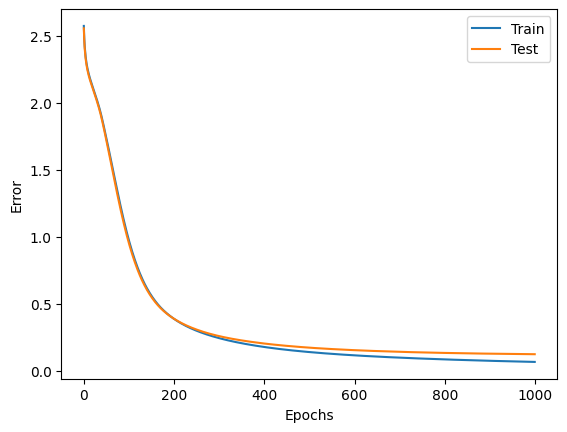

In [58]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 正解率

In [59]:
y_test_pred = net(X_test)
count = (y_test == y_test_pred.argmax(1)).sum().item()
print(f"正解率: {count / len(y_test)}")

正解率: 0.9711111111111111


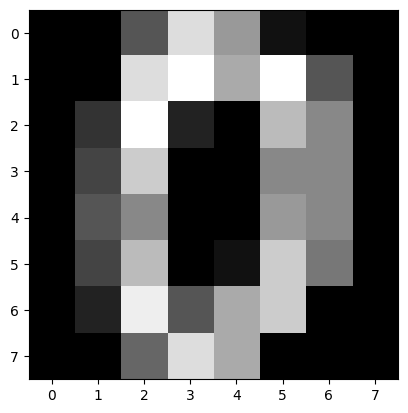

予測結果: 0
正解: 0


In [60]:
# 入力画像の表示
img_id = 0

x_pred = digits_img[img_id]
image = x_pred.reshape(8, 8)

plt.imshow(image, cmap="gray")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print(f"予測結果: {y_pred.argmax().item()}")
print(f"正解: {labels[img_id]}")